In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

# Importando dados

## About this dataset
- Age : Age of the patient


- Sex : Sex of the patient


- exang: exercise induced angina (1 = yes; 0 = no)


- ca: number of major vessels (0-3)


- cp : Chest Pain type chest pain type:

        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic


- trtbps : resting blood pressure (in mm Hg)


- chol : cholestoral in mg/dl fetched via BMI sensor


- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


- rest_ecg : resting electrocardiographic results:

        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

        
- thalach : maximum heart rate achieved


- target : 0= less chance of heart attack 1= more chance of heart attack




In [2]:
data = pd.read_csv('heart-attack-analysis/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df = pd.DataFrame(data)

In [5]:
#cria uma cópia do dataframe só com linhas sem dados faltantes
limpar_data = data.dropna()

In [6]:
limpar_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# verificando quantas linhas sobraram
print("antes:",len(data),"depois:",len(limpar_data))

antes: 303 depois: 303


Podemos perceber que não há nenhum dado faltante

In [38]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall'] # colunas categoricas
con_cols = ["age","trtbps","chol","thalachh","oldpeak"] # colunas com valores continuos
target = ["output"] # target

/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_20924/2262167953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1, data=df, x = 'output',palette = 'PuBu')
/var/folders/9z/ch74qjn969vft037hvrv54vm0000gn/T/ipykernel_20924/2262167953.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(["Chance baixa de ataque cardiaco(0)","Chance alta de ataque cardiaco(1)"])


[Text(0, 0, 'Chance baixa de ataque cardiaco(0)'),
 Text(1, 0, 'Chance alta de ataque cardiaco(1)')]

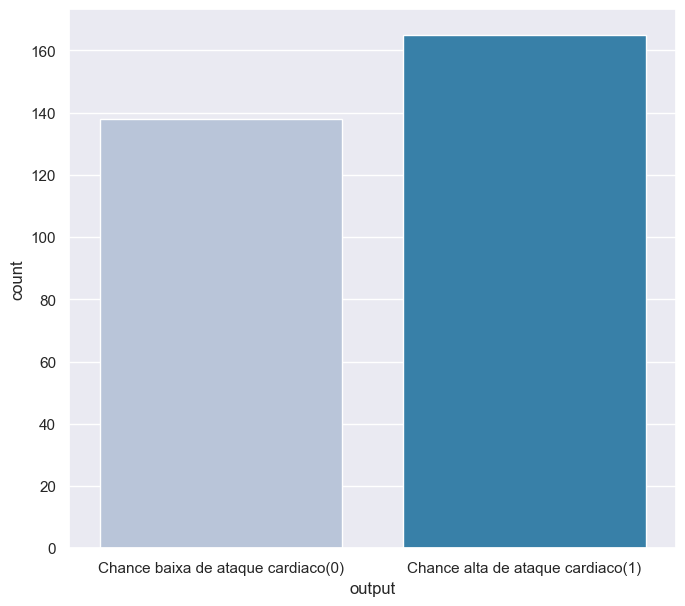

In [34]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0,1])

# Target Count
sns.countplot(ax=ax1, data=df, x = 'output',palette = 'PuBu')
ax1.set_xticklabels(["Chance baixa de ataque cardiaco(0)","Chance alta de ataque cardiaco(1)"])


<Axes: xlabel='output'>

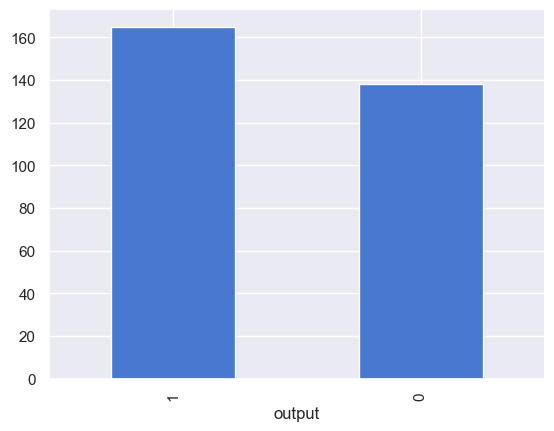

In [35]:
df_target = pd.DataFrame(df,columns=['output'])

#df_target.output.value_counts()

df.output.value_counts().plot.bar()


In [39]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


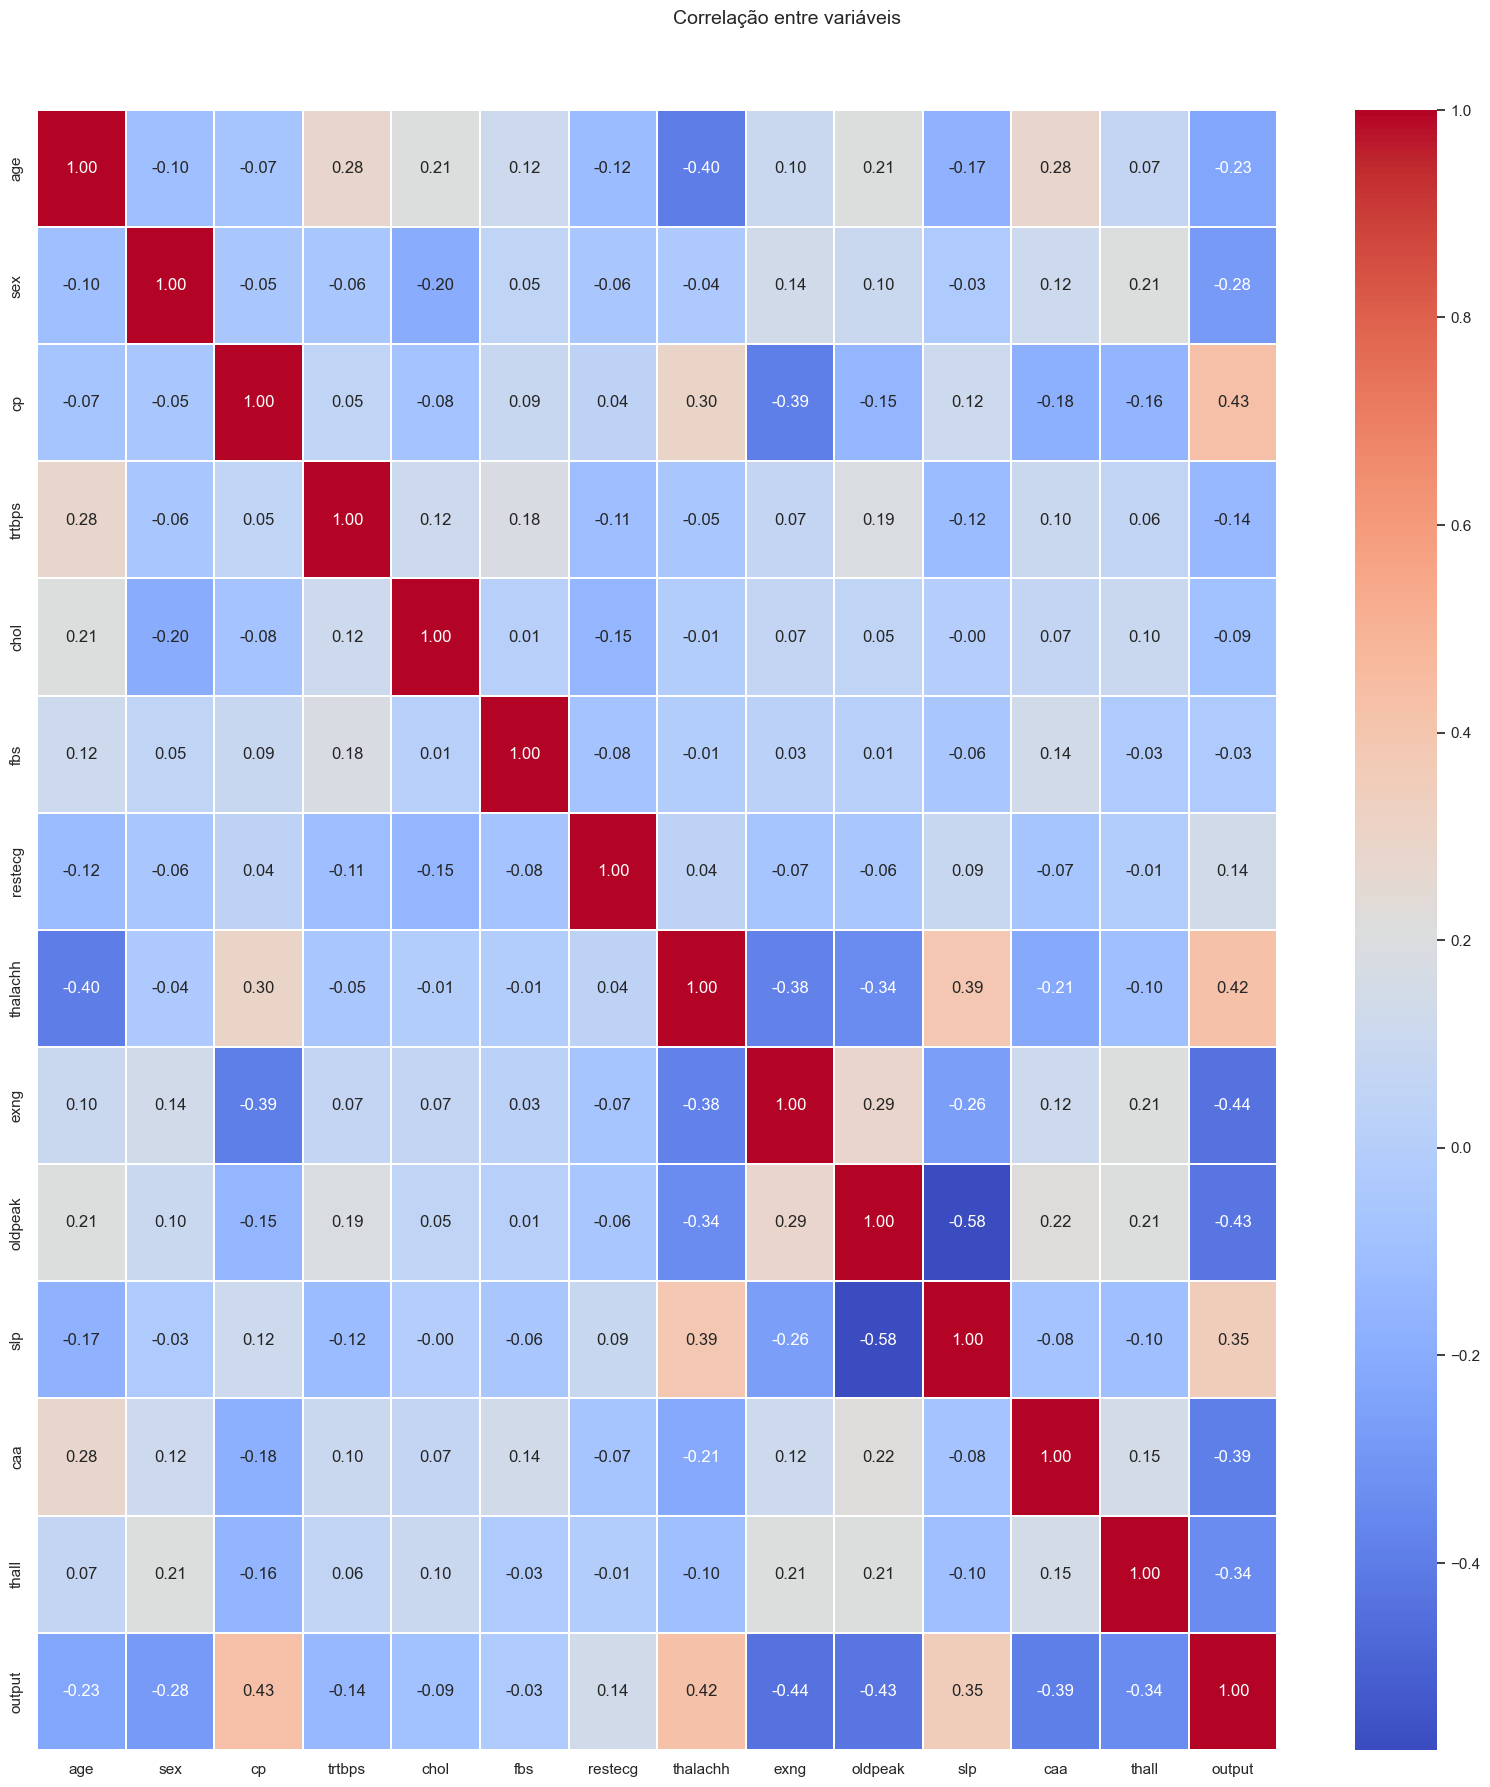

In [43]:
# Correlação entre dados

f, ax = plt.subplots(figsize=(20,20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)